In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader.famafrench import get_available_datasets,FamaFrenchReader
import pandas_datareader.data as web
import warnings
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
warnings.simplefilter(action="ignore", category=FutureWarning)

tickers = [
    'DIS', 'UHS', 'GOOGL', 'LOW', 'BSX', 'JPM', 'EOG', 'SBAC', 'STT', 'DVN',
    'VRTX', 'BK', 'ALL', 'WY', 'OXY', 'ON', 'EXC', 'UAL', 'AKAM', 'SMCI',
    'LYV', 'AMD', 'VLO', 'NI', 'DRI', 'SJM', 'APH', 'MAS', 'CMG', 'TXT'
]

n_tickers = len(tickers)

start_date = '2014-01-01'
end_date = '2023-12-31'

# Download the daily data from stocks
price = yf.download(tickers, start=start_date, end=end_date, progress=False)['Adj Close']
daily_returns_stocks = price.pct_change()
daily_returns_stocks = daily_returns_stocks.dropna()

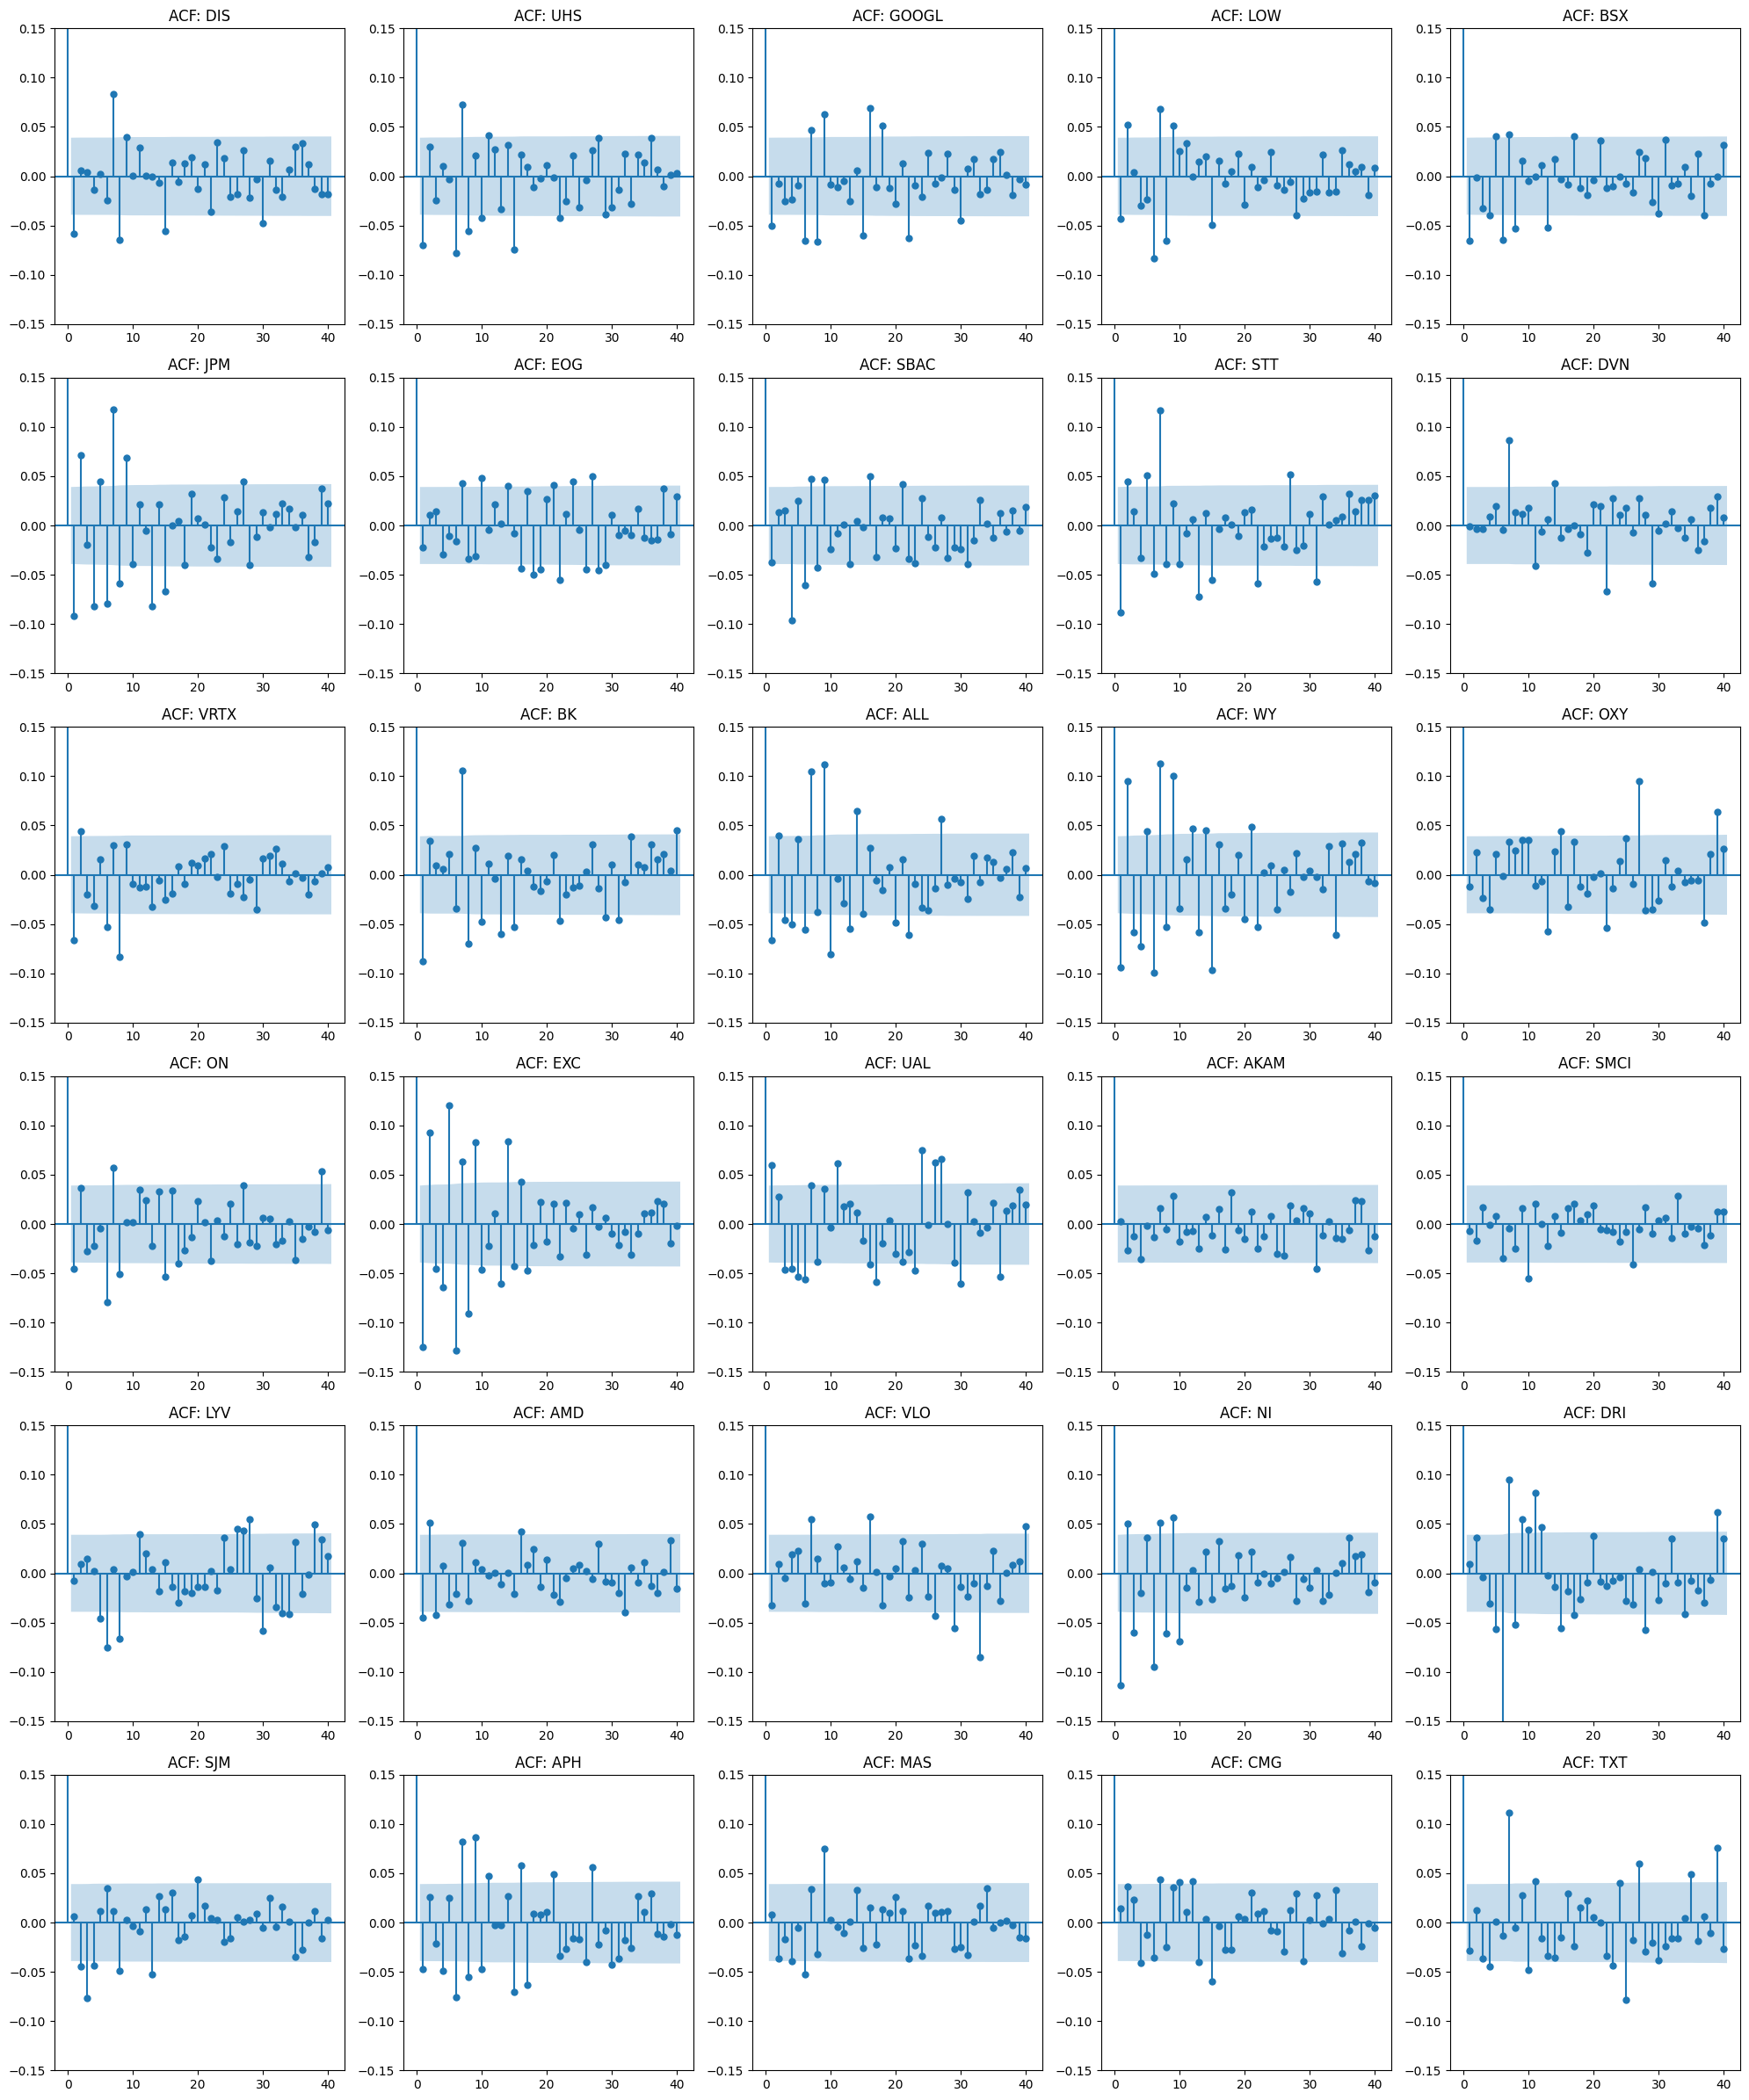

In [10]:

# Determine the number of rows and columns for the grid of subplots
n_tickers = len(tickers)
n_cols = 5  # Adjust this number based on the width of your plot
n_rows = (n_tickers // n_cols) + (n_tickers % n_cols > 0)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Loop through each ticker and create an ACF plot in the corresponding subplot
for i, ticker in enumerate(tickers):
    data = daily_returns_stocks[ticker].dropna()

    plot_acf(daily_returns_stocks[ticker].dropna(), lags=40, ax=axes[i], title=f'ACF: {ticker}')
    axes[i].set_ylim(-0.15,0.15)


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

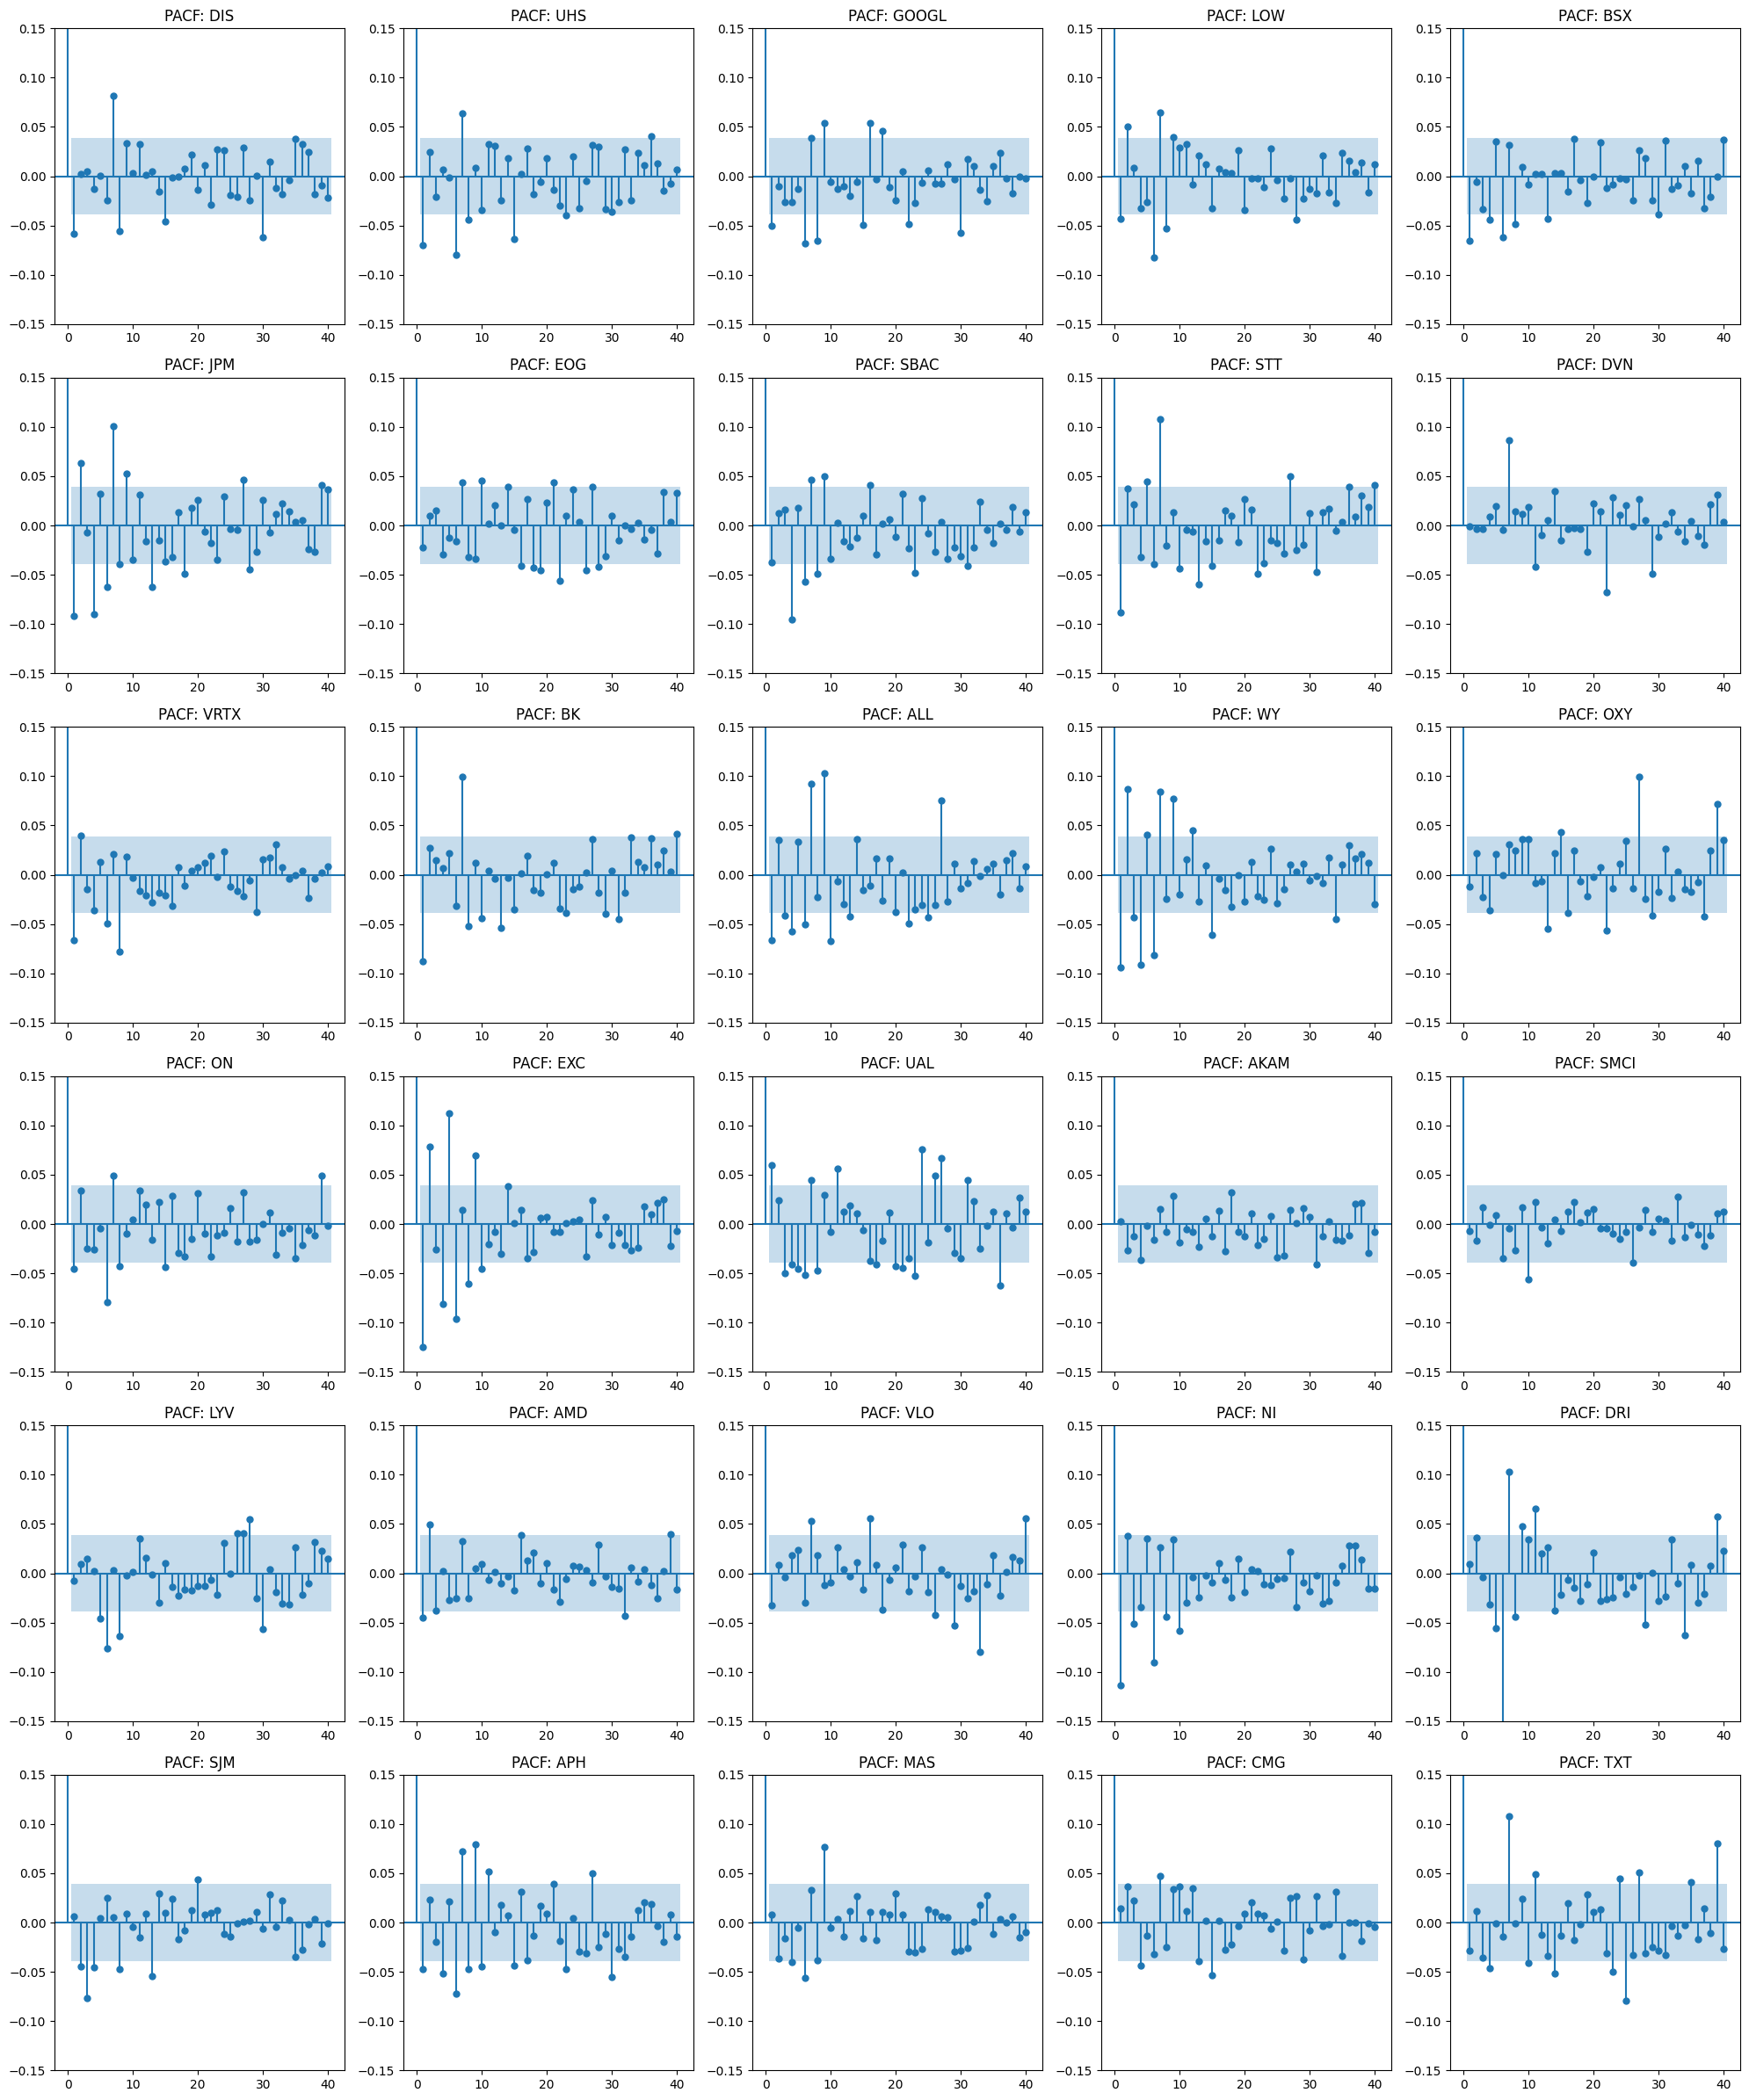

In [9]:
# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()
for i, ticker in enumerate(tickers):
    plot_pacf(daily_returns_stocks[ticker], lags=40, ax=axes[i], title=f'PACF: {ticker}')
    axes[i].set_ylim(-0.15,0.15)


plt.tight_layout()
plt.show()

ACF (Autocorrelation Function):

- Significant Spikes: If the ACF plot shows significant spikes at lags (i.e., autocorrelations are notably different from zero), it suggests that returns are correlated with past returns at those specific lags. This implies dependence on past returns.

- Gradual Decay: A gradual decay in the ACF plot indicates that past returns have a more persistent effect on future returns, which might suggest an AR (AutoRegressive) process.

PACF (Partial Autocorrelation Function):

- Significant Spikes at Specific Lags: If the PACF shows significant spikes at specific lags and drops off after a certain lag, it suggests that past returns directly influence future returns up to that lag. For example, if PACF has a significant spike at lag 1 and no significant spikes afterward, it might indicate an AR(1) process.

- Cut-off: If PACF cuts off abruptly after a specific lag, this suggests that the returns' dependence on past values is limited to those lags.

Step 3: Assess Dependence on Past Returns


- If many stocks show significant autocorrelation (ACF) or significant partial autocorrelation (PACF) at multiple lags, this suggests that returns for those stocks are dependent on past returns.
- If the ACF plots drop off quickly and the PACF shows no significant spikes beyond lag 0 or lag 1, the returns are less dependent on past returns and might resemble white noise.